In [73]:
import numpy as np
from datetime import date
import matplotlib.pyplot as plt
import pandas as pd
import netCDF4 as nc
import xarray as xr

In [74]:

import Libraries.marineHeatWaves_AS_v2 as mhw_v2

%matplotlib inline

In [75]:
path = "D:/Repositories/too_much_big_data/" + 'NOAA_SST_KoreanPeninsula_1981-2025_FULL.nc'
data = nc.Dataset(path)

data

<class 'netCDF4.Dataset'>
root group (NETCDF4 data model, file format HDF5):
    Conventions: CF-1.5
    title: NOAA SST Korean Peninsula Region (1981-2025)
    institution: NOAA/NCDC
    source: NOAA/NCDC  ftp://eclipse.ncdc.noaa.gov/pub/OI-daily-v2/
    history: Thu Aug 24 13:34:17 2017: ncatted -O -a References,global,d,, sst.day.mean.1981.v2.nc
Version 1.0
    dataset_title: NOAA Daily Optimum Interpolation Sea Surface Temperature
    References: https://www.psl.noaa.gov/data/gridded/data.noaa.oisst.v2.highres.html
    comment: Reynolds, et al.(2007) Daily High-Resolution-Blended Analyses for Sea Surface Temperature (available at https://doi.org/10.1175/2007JCLI1824.1). Banzon, et al.(2016) A long-term record of blended satellite and in situ sea-surface temperature for climate monitoring, modeling and environmental studies (available at https://doi.org/10.5194/essd-8-165-2016). Huang, B., C. Liu, V. Banzon, E. Freeman, G. Graham, B. Hankins, T. Smith, and H.-M. Zhang, 2021: Improve

In [138]:
ds = xr.open_dataset(path)
sst = ds['sst']
sst.sel(time='2011-01-01', lat=30.125, lon=120.625).values


array(11.21, dtype=float32)

In [154]:
start_year = 1982
end_year = 2011

In [146]:
from datetime import datetime, timedelta

start_date = datetime(start_year, 1, 1)
end_date = datetime(end_year, 12, 31)

year_list = []
year_datetime_list = []

current_date = start_date
while current_date <= end_date:
    formatted_date = current_date.strftime(f"%Y-{"%m".zfill(2)}-{"%d".zfill(2)}")
    year_datetime_list.append(current_date)
    year_list.append(formatted_date)
    current_date += timedelta(days=1)

print((year_datetime_list))


[datetime.datetime(1982, 1, 1, 0, 0), datetime.datetime(1982, 1, 2, 0, 0), datetime.datetime(1982, 1, 3, 0, 0), datetime.datetime(1982, 1, 4, 0, 0), datetime.datetime(1982, 1, 5, 0, 0), datetime.datetime(1982, 1, 6, 0, 0), datetime.datetime(1982, 1, 7, 0, 0), datetime.datetime(1982, 1, 8, 0, 0), datetime.datetime(1982, 1, 9, 0, 0), datetime.datetime(1982, 1, 10, 0, 0), datetime.datetime(1982, 1, 11, 0, 0), datetime.datetime(1982, 1, 12, 0, 0), datetime.datetime(1982, 1, 13, 0, 0), datetime.datetime(1982, 1, 14, 0, 0), datetime.datetime(1982, 1, 15, 0, 0), datetime.datetime(1982, 1, 16, 0, 0), datetime.datetime(1982, 1, 17, 0, 0), datetime.datetime(1982, 1, 18, 0, 0), datetime.datetime(1982, 1, 19, 0, 0), datetime.datetime(1982, 1, 20, 0, 0), datetime.datetime(1982, 1, 21, 0, 0), datetime.datetime(1982, 1, 22, 0, 0), datetime.datetime(1982, 1, 23, 0, 0), datetime.datetime(1982, 1, 24, 0, 0), datetime.datetime(1982, 1, 25, 0, 0), datetime.datetime(1982, 1, 26, 0, 0), datetime.datetime(19

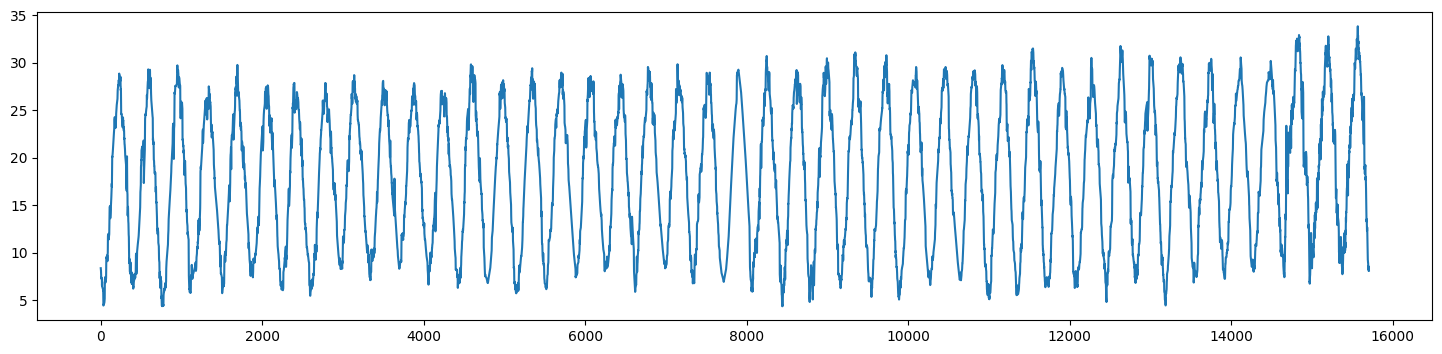

In [153]:
ds = xr.open_dataset(path)
sst = ds['sst']
c_sst = sst.sel(time=year_list, lat=30.125, lon=120.625).values


plt.figure(figsize=(18, 4))
plt.plot(c_sst)

In [142]:
from datetime import date
t = np.array([i.toordinal() for i in year_datetime_list])
t

array([723546, 723547, 723548, ..., 739249, 739250, 739251])

In [ ]:
Time_Period = [start_year, end_year]
mhws, clim = mhw_v2.detect(t, c_sst, climatologyPeriod = Time_Period, MHWPeriod = Time_Period, smoothPercentileWidth = 31, pctile = 90)
m = mhws['duration'].index(max(mhws['duration']))
print(mhws['date_start'][m])
print(mhws['date_end'][m])
# print(mhws['date_start'][70])
# print(mhws['date_end'][70])
mhws

2022-02-25
2022-06-18


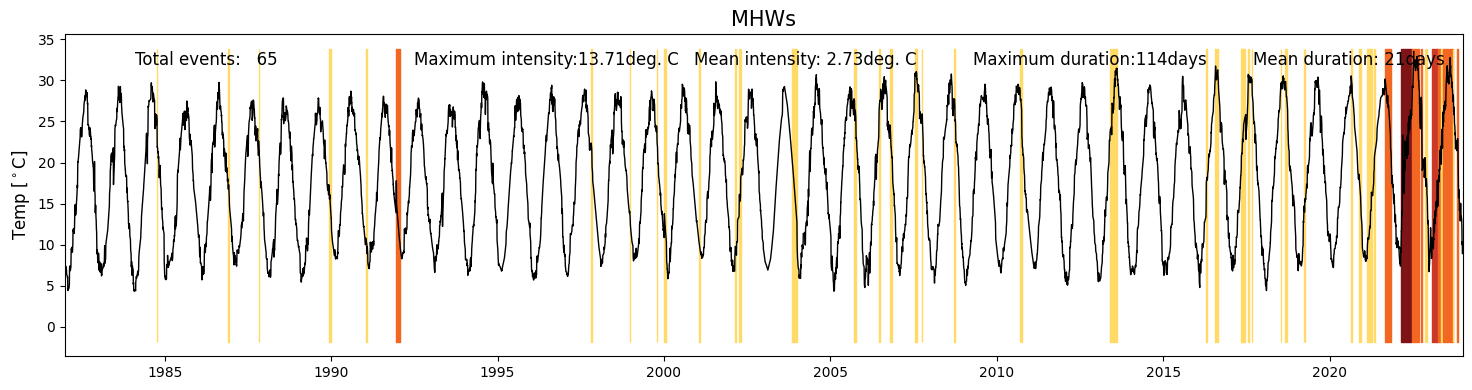

In [157]:
# Plot with categories and a few statistics of extreme events
import datetime

mhwname = 'MHW'
col_clim = '0.25'
col_thresh = 'k--'
col_evMax = 'r'
#From top to bottom: Blue, no marine heatwave, Moderate, Strong, Severe, Extreme
col_blue = (81/255, 99/255, 176/255) # blue
col_cat0 = (.5, .5, .50) # no
col_cat1 =  (255/255, 218/255, 103/255) # Moderate
col_cat2 =  (242/255, 103/255, 33/255) # Strong
col_cat3 =  (203/255, 56/255, 38/255) # Severe
col_cat4 =  (127/255, 20/255, 22/255)# Extreme

###
fig = plt.figure(figsize=(15,4))
ax = plt.subplot(1,1,1)
plt.title('MHWs', size=15)
plt.plot(year_datetime_list, c_sst, 'k-', linewidth=1)

# Fill events
for i in range(mhws['n_events']):
    t1 = np.where(t==mhws['time_start'][i])[0][0]
    t2 = np.where(t==mhws['time_end'][i])[0][0]
    if mhws['category'][i] == 'Moderate':
        plt.fill_between(year_datetime_list[t1:t2+1], np.nanmin(sst), np.nanmax(sst), color=col_cat1)
    if mhws['category'][i] == 'Strong':
        plt.fill_between(year_datetime_list[t1:t2+1], np.nanmin(sst), np.nanmax(sst), color=col_cat2)
    if mhws['category'][i] == 'Severe':
        plt.fill_between(year_datetime_list[t1:t2+1], np.nanmin(sst), np.nanmax(sst), color=col_cat3)
    if mhws['category'][i] == 'Extreme':
        plt.fill_between(year_datetime_list[t1:t2+1], np.nanmin(sst), np.nanmax(sst), color=col_cat4)


# Stats
plt.text(0.05, 0.92,'Total events:' + "{:5.0f}".format(mhws['n_events']), ha='left', va='center', transform=ax.transAxes,size=12)
plt.text(0.25, 0.92,'Maximum intensity:' + "{:5.2f}".format(np.max(mhws['intensity_max'])) + 'deg. C', ha='left', va='center', transform=ax.transAxes,size=12)
plt.text(0.45, 0.92,'Mean intensity:' + "{:5.2f}".format(np.mean(mhws['intensity_mean'])) + 'deg. C', ha='left', va='center', transform=ax.transAxes,size=12)
plt.text(0.65, 0.92,'Maximum duration:' + "{:3.0f}".format(np.max(mhws['duration'])) + 'days', ha='left', va='center', transform=ax.transAxes,size=12)
plt.text(0.85, 0.92,'Mean duration:' + "{:3.0f}".format(np.mean(mhws['duration'])) + 'days', ha='left', va='center', transform=ax.transAxes,size=12)


plt.ylabel(r'Temp [$^\circ$C]',size=12)
plt.xlim(datetime.datetime(start_year,1,1), datetime.datetime(end_year,1,1))
plt.tight_layout()

plt.show()